This script contains the following points:
1. importing libraries.
2. importing the latest version of your merged project data set(ords_prods_merge_grouping_customers)
3. plotting bar chart and exporting that.
4. Creating Histograms and Scatter plot for checking the data distribution.

In [2]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. importing the latest version of your merged project data set(ords_prods_merge_grouping_customers)

In [3]:
#import .csv
path=r'E:\Instacart Basket Analysis'
ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_grouping_customers.pkl'))

<Axes: xlabel='orders_day_of_week'>

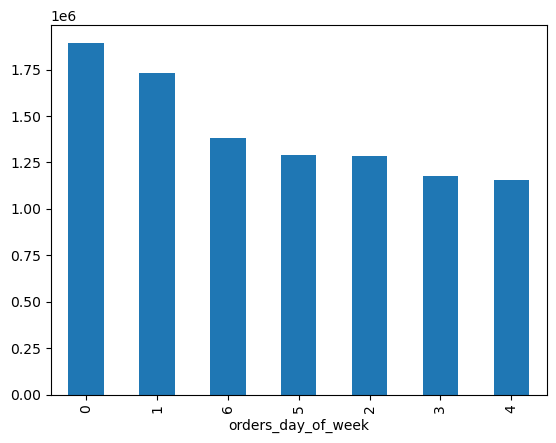

In [5]:
# ordering the observations from largest to smallest
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

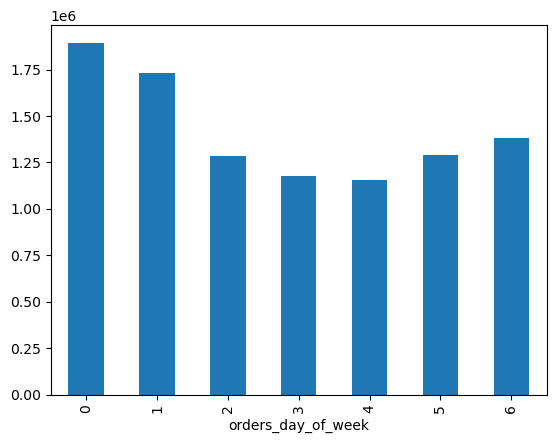

In [6]:
# sorting the bars in your chart according to their index order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

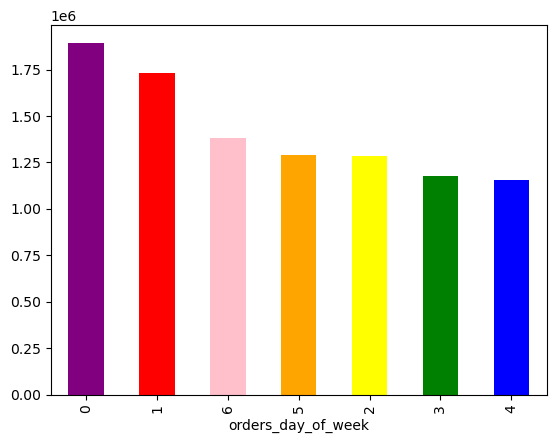

In [7]:
#making Bar chart colorful
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
#Exporting Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

4.Creating Histograms and Scatter plot for checking the data distribution

<Axes: ylabel='Frequency'>

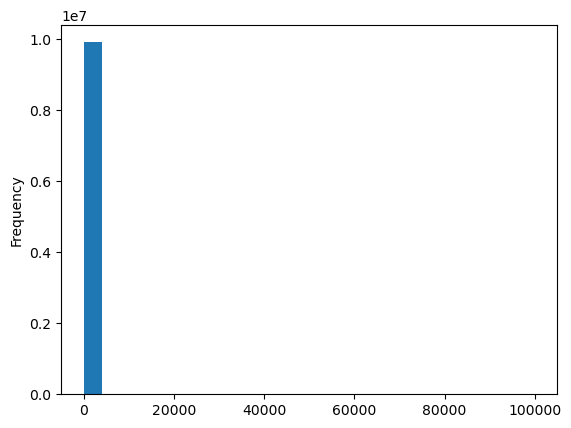

In [9]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# let's check the data
ords_prods_merge['prices'].describe()

count    9.918253e+06
mean     1.116030e+01
std      4.168003e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
ords_prods_merge['prices'].mean()

11.160295709335118

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

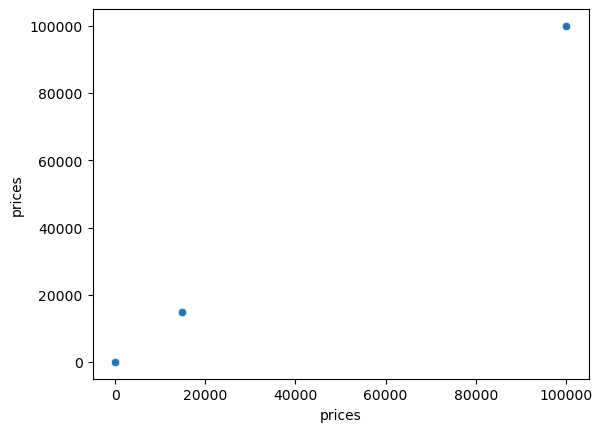

In [15]:
# Scatter plot for checking the data distribution
sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)

#something goes wrong hier, because the median and mean are in the same range and max prices is 99999 $ and it seems crazy!
Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. 

In [17]:
#findding outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,busiest day,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag
3075482,3075482,912404,17,prior,12,2,14,5.0,21553,5,...,Regularly busy,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.000000,Frequent customer.
3075483,3075483,603376,17,prior,22,6,16,4.0,21553,3,...,Regularly busy,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.000000,Frequent customer.
3075484,3075484,3264360,135,prior,2,2,21,13.0,21553,6,...,Regularly busy,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,11.557418,Regular customer.
3075485,3075485,892534,135,prior,3,0,8,12.0,21553,3,...,Busiest day,Busiest day,Busiest day,Most orders,4,New customer,1154.792308,High_spender,11.557418,Regular customer.
3075486,3075486,229704,342,prior,8,1,19,30.0,21553,9,...,Regularly busy,Regularly busy,Regularly busy,Fewest orders,16,Regular customer,114.426619,High_spender,20.000000,Regular customer.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934526,8934526,1129338,58405,prior,13,1,10,29.0,33664,2,...,Regularly busy,Regularly busy,Regularly busy,Most orders,17,Regular customer,1603.034574,High_spender,26.000000,Non-frequent customer.
8934527,8934527,190064,58405,prior,15,5,17,26.0,33664,6,...,Regularly busy,Regularly busy,Regularly busy,Fewest orders,17,Regular customer,1603.034574,High_spender,26.000000,Non-frequent customer.
8934528,8934528,1842539,58405,prior,16,0,16,30.0,33664,5,...,Busiest day,Busiest day,Busiest day,Most orders,17,Regular customer,1603.034574,High_spender,26.000000,Non-frequent customer.
8934529,8934529,245547,58599,prior,18,0,21,6.0,33664,14,...,Busiest day,Busiest day,Busiest day,Average orders,18,Regular customer,468.976037,High_spender,8.000000,Frequent customer.


In [18]:
 #marking them as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [20]:
#lets check whether the replacement was successful
ords_prods_merge['prices'].max()

25.0

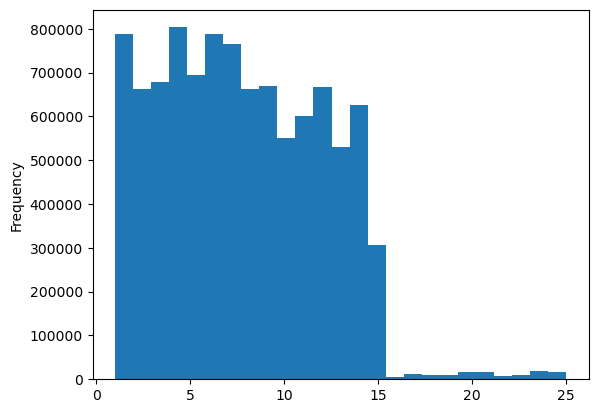

In [22]:
# Histograms
hist=ords_prods_merge['prices'].plot.hist(bins = 25)

#most products are between $1 and $15, while a few are higher priced at $15 to $25.

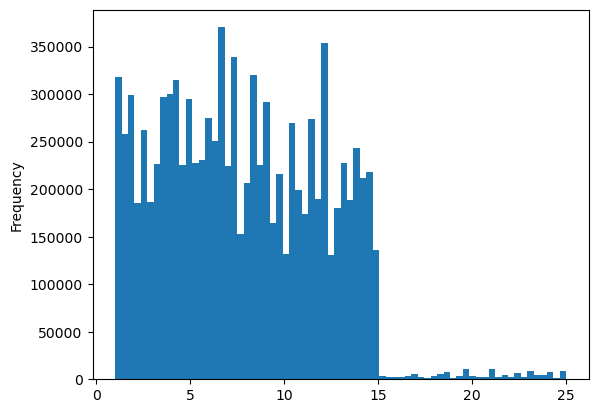

In [23]:
# Histograms
hist_2=ords_prods_merge['prices'].plot.hist(bins = 70)

In [24]:
#Exporting Histograms chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_orders_dow.png'))

In [25]:
#Sampling Data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
big = ords_prods_merge[dev]

In [29]:
small = ords_prods_merge[~dev]

In [30]:
len(ords_prods_merge)

9918253

In [31]:
len(small)+len(big)

9918253

In [32]:
df_2 = small[['orders_day_of_week','prices']]

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


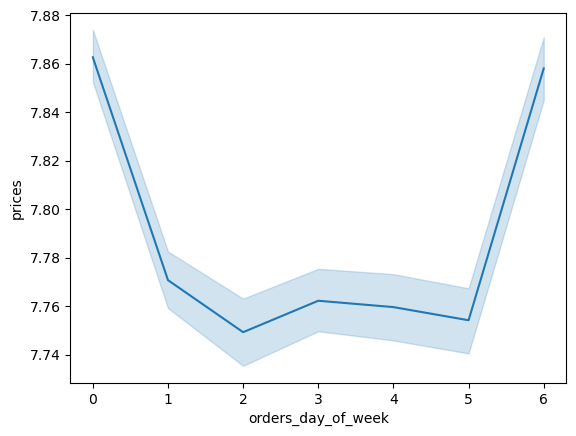

In [36]:
# line chart
line = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')